# Main for StockRow screener
This notebook contains code to 
1. Pull financial data from an external source 
2. Lightly clean the data
3. Perform introductory financial analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import os
import time

In [2]:
stock_list = pd.read_csv('list_of_stocks.csv')
stock_list.head(2)

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,CUSIP,ISIN,SEDOL,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,AAPL,APPLE INC,Information Technology,Equity,"1,875,566,056.60",4.85,"1,875,566,056.60","14,040,770.00",37833100,US0378331005,2046251,133.58,United States,NASDAQ,USD,1,USD,--
1,MSFT,MICROSOFT CORP,Information Technology,Equity,"1,709,995,853.92",4.42,"1,709,995,853.92","6,717,457.00",594918104,US5949181045,2588173,254.56,United States,NASDAQ,USD,1,USD,--


In [3]:
# this function pulls Income Statement data from StockRow.com
    # based on the user's choice of ticker
# and outputs a DataFrame of the Income Statement

##### btw PLEASE visit stockrow.com #####
##### they made a wonderful resource ####

## also the 'meat' of this code comes from:
## https://www.kite.com/python/answers/how-to-download-a-csv-file-from-a-url-in-python

def income_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [4]:
# this function pulls Balance Sheet data from StockRow.com

def balance_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=Q&section=Balance%20Sheet&sort=desc'
    response = requests.get(url)
    with open(os.path.join("BalanceSheet", f"{ticker}_balance.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./BalanceSheet/{ticker}_balance.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [5]:
# this function prompts the user for a ticker input
# and calls the income_puller() function to return a DataFrame
# same for balance_puller() to return Balance Sheet info
def ticker_input():
    ticker = input('Please enter a ticker').upper()
    income_df = income_puller(ticker.upper())
    balance_df = balance_puller(ticker.upper())
    return income_df, balance_df,ticker

In [24]:
# call the function and print charts
income_df,balance_df, ticker = ticker_input()
ticker.upper()

Please enter a ticker SWKS


'SWKS'

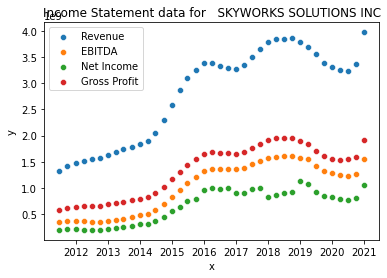

In [25]:
# plot the charts I like most
sns.scatterplot(data=income_df,x=income_df.index,y='Revenue')
sns.scatterplot(data=income_df,x=income_df.index,y='EBITDA')
sns.scatterplot(data=income_df,x=income_df.index,y='Net Income Common')
sns.scatterplot(data=income_df,x=income_df.index,y='Gross Profit').set(xlabel='x',ylabel='y')
plt.legend(labels=['Revenue','EBITDA','Net Income','Gross Profit']);

# this code is optional, it may bounce errors
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Income Statement data for {ticker_name[5:]}');

<AxesSubplot:ylabel='Cash and Short Term Investments'>

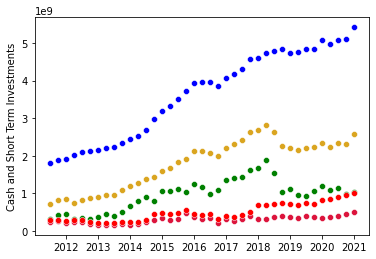

In [26]:
sns.scatterplot(data=balance_df,x=balance_df.index,y="Cash and Short Term Investments", color='green')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current assets", color='goldenrod')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total Assets", color='blue')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current liabilities", color='crimson')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total liabilities",color='red')

In [96]:
#code to pull data in bulk
ticker_list = stock_list['Ticker'][:10]

for ticker in ticker_list:
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=Q&section=Balance%20Sheet&sort=desc'    
    response = requests.get(url)
    with open(os.path.join("BalanceSheet", f"{ticker}_bal.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)

In [97]:
ticker_list = stock_list['Ticker'][:10]

for ticker in ticker_list:
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)

In [98]:
balance_df.head()

Unnamed: 0,Cash and Short Term Investments,Receivables,Inventory,Other current assets,Total current assets,"Property, Plant, Equpment (Net)",Long-Term Investments,Long-term receivables,Goodwill and Intangible Assets (Total),Long-term assets (Other),...,Additional Paid In Capital,Common Stock (Net),Retained Earnings,Common Equity (Total),Shareholders Equity (Total),Shareholders Equity and Liabilities (Total),Shares (Common),Shareholders Equity (Tangible),Net Debt,Total Debt
2021-03-31 00:00:00,1.7141e+10,1.89e+09,4.132e+09,NaN,2.4705e+10,1.3868e+10,NaN,NaN,5.05e+08,8.851e+09,...,2.7623e+10,1e+06,-4.75e+09,2.3864e+10,2.3864e+10,5.2972e+10,9.63e+08,2.3359e+10,-8.088e+09,9.053e+09
2020-12-31 00:00:00,1.9622e+10,1.886e+09,3.849e+09,1.108e+09,2.6717e+10,2.3375e+10,2.79e+08,NaN,5.2e+08,9.23e+08,...,2.726e+10,1e+06,-5.399e+09,2.2225e+10,2.2225e+10,5.2148e+10,9.6e+08,2.2555e+10,-6.275e+09,1.3347e+10
2020-09-30 00:00:00,1.4705e+10,1.757e+09,3.841e+09,1.064e+09,2.1744e+10,2.199e+10,2.98e+08,NaN,5.21e+08,7.96e+08,...,2.1574e+10,1e+06,-5.669e+09,1.6031e+10,1.6031e+10,4.5691e+10,9.48e+08,1.6371e+10,4.58e+08,1.5163e+10
2020-06-30 00:00:00,8.818e+09,1.485e+09,4.331e+09,1.015e+09,1.5336e+10,2.0876e+10,2.88e+08,NaN,5.08e+08,7.76e+08,...,1.5895e+10,0,-6e+09,9.855e+09,9.855e+09,3.8135e+10,9.3e+08,1.0216e+10,6.659e+09,1.5477e+10
2020-03-31 00:00:00,8.273e+09,1.274e+09,3.316e+09,8.52e+08,1.4893e+10,2.0468e+10,2.74e+08,NaN,5.16e+08,7.41e+08,...,1.539e+10,0,-6.104e+09,9.173e+09,9.173e+09,3.725e+10,9.25e+08,9.524e+09,6.927e+09,1.52e+10


In [100]:
balance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 2021-03-31 00:00:00 to 2011-06-30 00:00:00
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Cash and Short Term Investments              40 non-null     object
 1   Receivables                                  40 non-null     object
 2   Inventory                                    40 non-null     object
 3   Other current assets                         5 non-null      object
 4   Total current assets                         40 non-null     object
 5   Property, Plant, Equpment (Net)              40 non-null     object
 6   Long-Term Investments                        5 non-null      object
 7   Long-term receivables                        13 non-null     object
 8   Goodwill and Intangible Assets (Total)       19 non-null     object
 9   Long-term assets (Other)                     40 non-null   